In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.sans-serif'] = ['Times New Roman']
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use("seaborn")
import seaborn as sns 
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor # RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb # xgboost 

# stsatisic 
import statsmodels.api as sas 
from scipy import stats 
# seaborn plot 
import seaborn as sns 
from statsmodels.formula.api import ols


# Load train data

In [46]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Preprocessing 

In [47]:
train_df["datetime"] = pd.to_datetime(train_df["datetime"]) # convert date format 

## Data Fields 

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [48]:
train_df.shape

(10886, 12)

## Data Check

### Check missing values 

In [49]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Data Visualization 

### Season 

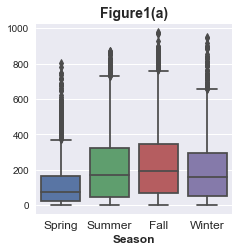

In [50]:
season_list = ["Spring", "Summer", "Fall", "Winter"]
plt.figure(figsize=(3.5, 3.5))
ax = sns.boxplot(x = "season", y = "count",  data=train_df)
ax.set_xticklabels(labels = season_list,  fontdict={"fontsize" : 12})
plt.title("Figure1(a)", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Season", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

### Holiday

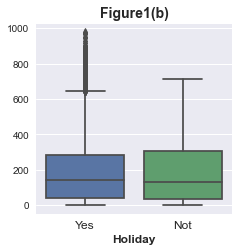

In [51]:
# sns.boxplot(x = "holiday", y = "count", data=train_df)
holiday_list = ["Yes", "Not"]
plt.figure(figsize=(3.5, 3.5))
ax = sns.boxplot(x = "holiday", y = "count",  data=train_df)
ax.set_xticklabels(labels = holiday_list,  fontdict={"fontsize" : 12})
plt.title("Figure1(b)", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Holiday", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

### WOrking day 

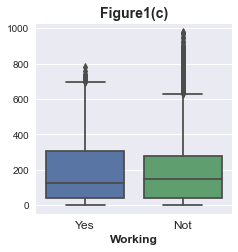

In [52]:
# sns.boxplot(x = "holiday", y = "count", data=train_df)
working_list = ["Yes", "Not"]
plt.figure(figsize=(3.5, 3.5))
ax = sns.boxplot(x = "workingday", y = "count",  data=train_df)
ax.set_xticklabels(labels = working_list,  fontdict={"fontsize" : 12})
plt.title("Figure1(c)", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Working", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

### Weather

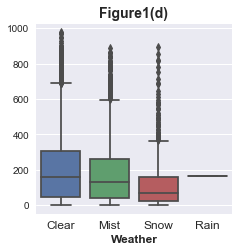

In [53]:
# sns.boxplot(x = "holiday", y = "count", data=train_df)
working_list = ["Clear", "Mist", "Snow", "Rain"]
plt.figure(figsize=(3.5, 3.5))
ax = sns.boxplot(x = "weather", y = "count",  data=train_df)
ax.set_xticklabels(labels = working_list,  fontdict={"fontsize" : 12})
plt.title("Figure1(d)", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Weather", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

### Distruibution of `count`

d:\Anaconda\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Anaconda\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


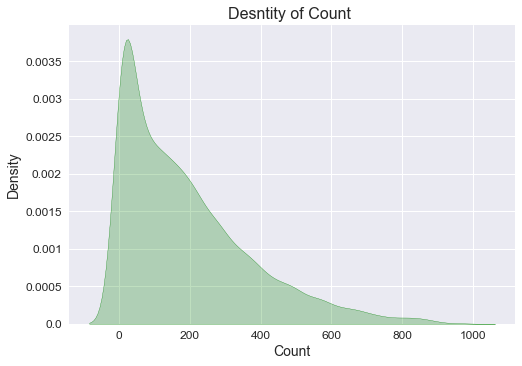

In [54]:
plt.title("Desntity of Count ", fontdict={"fontsize" : 16})
ax = sns.kdeplot(x = "count", data=train_df, shade=True, color="green")
ax.set_xticklabels(labels=range(-200, 1400, 200), fontdict={"fontsize" : 12})
ax.set_yticklabels(labels=np.arange(0, 0.004, 0.0005), fontdict={"fontsize" : 12})
ax.set_ylabel("Density", fontdict={"fontsize" : 14})
ax.set_xlabel("Count", fontdict={"fontsize" : 14})
plt.show()

### multivariate distribution 

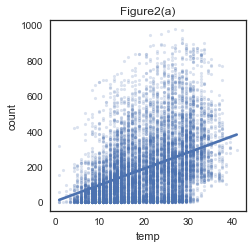

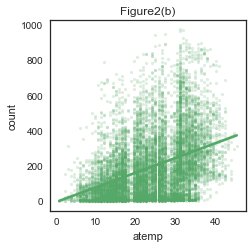

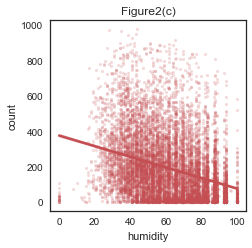

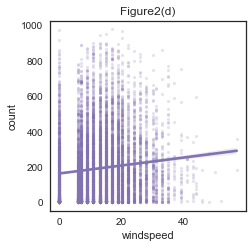

In [55]:
plt.style.use("seaborn-white")
num_list = list("abcd")
cols = ["temp",	"atemp",	"humidity",	"windspeed", "count"]
for (i, col) in enumerate(cols[:4]):
    plt.figure(figsize=(3.5, 3.5))
    plt.title("Figure2(" + num_list[i] + ")")
    ax = sns.regplot(y = "count", x = col, data=train_df , color="C" + str(i), scatter_kws={"alpha" : .2, "s" : 10})
    plt.show()

## Rent or not

In [56]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
new_df = train_df.iloc[:, -3:].copy()
new_df["id"] = range(len(train_df))
new_df.head()

,casual,registered,count,id
0,3,13,16,0
1,8,32,40,1
2,5,27,32,2
3,3,10,13,3
4,0,1,1,4


In [58]:
new_df = new_df.sort_values(by = "count")

In [59]:
demo = new_df.iloc[np.random.randint(len(train_df), size = 1000), :]

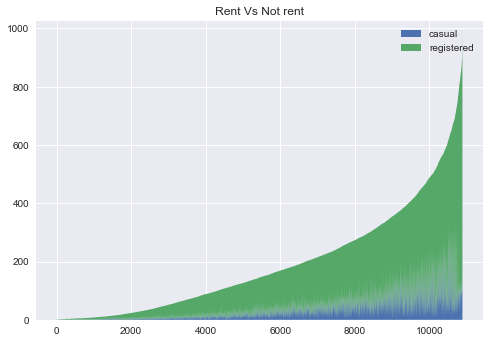

In [60]:
plt.style.use("seaborn")
plt.title("Rent Vs Not rent")
plt.stackplot(range(len(new_df)), new_df.iloc[:, :-2].values.T.tolist(), labels=new_df.columns[:-2])
plt.legend()

### Datetime features 

In [61]:
cost_df = train_df.copy()
cost_df["month"] = train_df["datetime"].dt.month 
cost_df["hour"] = train_df["datetime"].dt.hour 


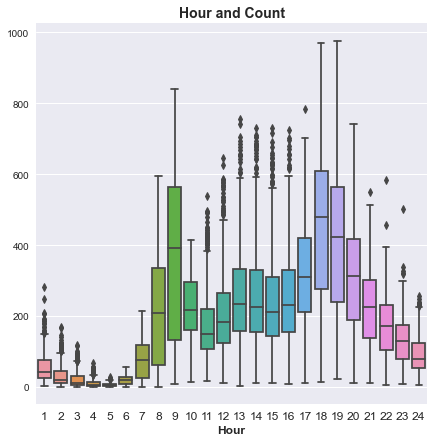

In [62]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x = "hour", y = "count",  data=cost_df)
ax.set_xticklabels(labels = range(1, 25),  fontdict={"fontsize" : 12})
plt.title("Hour and Count", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Hour", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

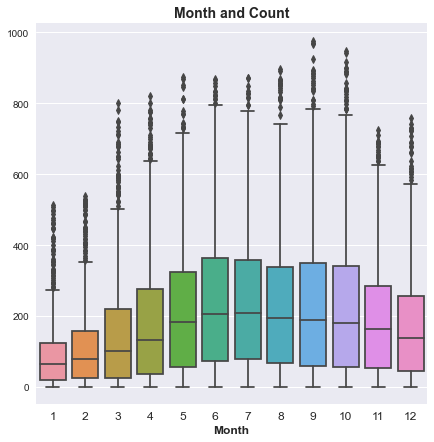

In [63]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x = "month", y = "count",  data=cost_df)
ax.set_xticklabels(labels = range(1, 13),  fontdict={"fontsize" : 12})
plt.title("Month and Count", fontdict={"fontsize" : 14, "weight" : "bold"})
plt.xlabel(xlabel="Month", fontdict={"fontsize" : 12, "weight" : "bold"})
plt.ylabel(ylabel="", fontdict={"fontsize" : 12})
plt.show()

# Statistic test

In [64]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## anova test

### season 

In [65]:
model = ols("count ~ C(season)", data=train_df).fit()
sas.stats.anova_lm(model, typ = 2)


,sum_sq,df,F,PR(>F)
C(season),2.190083e+07,3.0,236.946711,6.164843e-149
Residual,3.352721e+08,10882.0,NaN,NaN


### Holiday

In [66]:
model = ols("count ~ C(holiday)", data=train_df).fit()
sas.stats.anova_lm(model, typ = 2)


,sum_sq,df,F,PR(>F)
C(holiday),1.038812e+04,1.0,0.316563,0.573692
Residual,3.571625e+08,10884.0,NaN,NaN


### Working

In [67]:
model = ols("count ~ C(workingday)", data=train_df).fit()
sas.stats.anova_lm(model, typ = 2)


,sum_sq,df,F,PR(>F)
C(workingday),4.801037e+04,1.0,1.463199,0.226448
Residual,3.571249e+08,10884.0,NaN,NaN


### Weather

In [68]:
model = ols("count ~ C(weather)", data=train_df).fit()
sas.stats.anova_lm(model, typ = 2)


,sum_sq,df,F,PR(>F)
C(weather),6.338070e+06,3.0,65.530241,5.482069e-42
Residual,3.508348e+08,10882.0,NaN,NaN


## Simple Linear Regression Model


In [69]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [72]:
train_df["hour"] = train_df["datetime"].dt.hour
train_df["year"] = train_df["datetime"].dt.year
# train_df["month"] = train_df["datetime"].dt.month
# train_df.drop("month", axis=1)

In [73]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011


In [74]:
lr_df = train_df[["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year",  "count", "hour"]].copy()

In [75]:
model = ols("count ~ season+ holiday+ workingday+ weather+ temp+ atemp+ humidity+ windspeed+ year + hour", data=lr_df).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     687.2
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        05:04:07   Log-Likelihood:                -69380.
No. Observations:               10886   AIC:                         1.388e+05
Df Residuals:                   10875   BIC:                         1.389e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.667e+05   5507.442    -30.261      0.000   -1.77e+05   -1.56e+05
season        21.8618      1.300     16.823      0.000      19.314      24.409
holiday      -11.7436      8.442     -1.391      0.164     -28.292       4.805
workingday     0.0397      3.019      0.013      0.990      -5.878       5.958
weather       -5.2475      2.399     -2.188      0.029      -9.949      -0.546
temp           1.6808      1.040      1.616      0.106      -0.358       3.720
atemp          4.6814      0.957      4.891      0.000       2.805       6.558
humidity      -1.9930      0.088    -22.732      0.000      -2.165      -1.821
windspeed      0.6131      0.183      3.357      0.001       0.255       0.971
year          82.8664      2.738     30.268      0.000      77.500      88.233
hour           7.8018      0.208     37.445      0.000       7.393       8.210
==============================================================================
Omnibus:                     2086.582   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3970.307
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       4.784   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Machine-learning 

## Load tese data set 

In [77]:
test_df = pd.read_csv('./test.csv')
test_df["datetime"] = pd.to_datetime(test_df["datetime"])
test_df["hour"] = test_df["datetime"].dt.hour
test_df["year"] = test_df["datetime"].dt.year
# test_df["month"] = test_df["datetime"].dt.month

In [78]:
test_df.shape 

(6493, 11)

In [79]:
lr_test_df = test_df[["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "hour"]].copy()

## Split train data into tarin and validate 

In [81]:
X = train_df[[col for col in train_df.columns if col not in ["count", "datetime", "casual", "registered"]]]
y = train_df["count"]
np.random.seed(123)
x_train, x_val, y_train, y_val = train_test_split(X, y)
[x.shape for x in [x_train, x_val, y_train, y_val]]

[(8164, 10), (2722, 10), (8164,), (2722,)]

## Decision Tree

In [82]:
# Default parameters
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_val, y_val)

0.865015071398751

In [64]:
dtr_dic = {
    "depth" : [],
    "min_sample_leaf" : [],
    "mse" : [],
    "mae" : [],
    "r2" : []
}
for dep in range(2, 12):
    for min_sample_leaf in range(2, 40, 4):
        dtr = DecisionTreeRegressor(max_depth=dep, min_samples_leaf=min_sample_leaf)
        dtr.fit(x_train, y_train)
        y_pred = dtr.predict(x_val)
        dtr_dic["depth"].append(dep)
        dtr_dic["min_sample_leaf"].append(min_sample_leaf)
        dtr_dic["mse"].append(mean_squared_error(y_val, y_pred))
        dtr_dic["mae"].append(mean_absolute_error(y_val, y_pred))
        dtr_dic["r2"].append(r2_score(y_val, y_pred))

In [66]:
dtr_df = pd.DataFrame(dtr_dic)
dtr_df.to_csv('./dtr.csv', index=False)

In [67]:
dtr_df.head()

,depth,min_sample_leaf,mse,mae,r2
0,2,2,19994.082913,100.869705,0.394915
1,2,6,19994.082913,100.869705,0.394915
2,2,10,19994.082913,100.869705,0.394915
3,2,14,19994.082913,100.869705,0.394915
4,2,18,19994.082913,100.869705,0.394915


## Random Forest 

In [83]:
# Build a regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_val, y_val)

0.9335652042300506

In [84]:
rfr_dic = {
    "depth" : [],
    "n" : [],
    "mse" : [],
    "mae" : [],
    "r2" : []
}
for n in range(10, 210, 10):
    for dep in range(2, 11, 1):
        rfr = RandomForestRegressor(n_estimators=n, max_depth=dep)
        rfr.fit(x_train, y_train)
        y_pred = rfr.predict(x_val)
        rfr_dic["depth"].append(dep)
        rfr_dic["n"].append(n)
        rfr_dic["mse"].append(mean_squared_error(y_val, y_pred))
        rfr_dic["mae"].append(mean_absolute_error(y_val, y_pred))
        rfr_dic["r2"].append(r2_score(y_val, y_pred))

In [85]:
rfr_df = pd.DataFrame(rfr_dic)
rfr_df

,depth,n,mse,mae,r2
0,2,10,18855.168325,97.766342,0.415319
1,3,10,15374.926667,87.688403,0.523238
2,4,10,13210.244505,79.029838,0.590363
3,5,10,10924.544696,69.511606,0.661240
4,6,10,9115.905225,61.842913,0.717324
5,7,10,6120.638517,50.378067,0.810205
6,8,10,4756.886902,44.606975,0.852493
7,9,10,3585.710674,38.009888,0.888810
8,10,10,2788.231431,33.831558,0.913540
9,2,20,18962.194658,97.846855,0.412000


array([<AxesSubplot:xlabel='n'>, <AxesSubplot:xlabel='n'>,
       <AxesSubplot:xlabel='n'>], dtype=object)

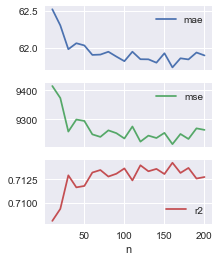

In [93]:
rfr_df.groupby(by  = "n")[["mae", "mse", "r2"]].mean().plot(subplots=True, figsize=(3, 4))

array([<AxesSubplot:xlabel='depth'>, <AxesSubplot:xlabel='depth'>,
       <AxesSubplot:xlabel='depth'>], dtype=object)

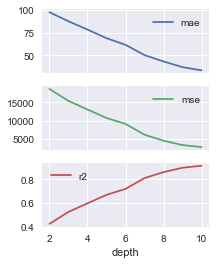

In [94]:
rfr_df.groupby(by  = "depth")[["mae", "mse", "r2"]].mean().plot(subplots=True, figsize=(3, 4))